# **Fatal Police Shootings, 2015-Present**




## **1.Introduction**

This project will take a look at killings that took place at the hands of police officers in the United States from the beginning of 2015 to into February 2017.


### **1.1 Dataset**

The Dataset information can be found here [police dataseet](https://www.kaggle.com/datasets/washingtonpost/police-shootings)

### **1.2 Goal**

The main goal is to explore the data,and  list the issues with the police activity and propose a plan which issues to tackle first and how.

## **2.Import and Loading Data**



In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set_theme(style="whitegrid")
import scipy.stats as st
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

In [97]:
df = pd.read_csv("/content/database.csv")

## **3.Basic Checks**

In [98]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

The dataset gives the impressions of each case and discusses the various factors involved in police brutality such as race, manner of death and city and so on.


In [100]:
df.shape

(2142, 14)

The Dataset has 2142 records with 14 features

## **4.Data Wrangling**

### **4.1 Data Cleaning**

In [101]:
# race colums has some abbrevations replacing with real meanings
df = df.replace(
    {
        "race": {
            "W": "White",
            "B": "Black",
            "A": "Asian",
            "H": "Hispanic",
            "O": "Other",
            "N": "Native",
        }
    }
)

In [102]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


### **4.2 Missing Values**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

The dataset contains some null values need to be cleaned

In [104]:
# Counting null values in each column
df.isnull().sum()

id                           0
name                        19
date                         0
manner_of_death              0
armed                        6
age                         43
gender                       1
race                       103
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        36
body_camera                  0
dtype: int64

The race column is missing the maximum data followed by age,flee,name and gender


In [105]:
# Dropping all null values
df_clean = df.dropna().drop("id", axis=1).reset_index()

In [106]:
df_clean

,index,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,2137,James Leroy Marker,2017-02-26,shot,gun,66.0,M,White,Floral City,FL,False,other,Car,False
1982,2138,Joey J. Bridges,2017-02-27,shot,gun,27.0,M,White,Shelby,NC,True,attack,Foot,False
1983,2139,Shawn M. Igers,2017-02-27,shot,gun,40.0,M,White,Corning,WI,False,attack,Not fleeing,False
1984,2140,Earl Riley,2017-02-28,shot,gun,25.0,M,Black,Houston,TX,False,attack,Not fleeing,False


In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    1986 non-null   int64  
 1   name                     1986 non-null   object 
 2   date                     1986 non-null   object 
 3   manner_of_death          1986 non-null   object 
 4   armed                    1986 non-null   object 
 5   age                      1986 non-null   float64
 6   gender                   1986 non-null   object 
 7   race                     1986 non-null   object 
 8   city                     1986 non-null   object 
 9   state                    1986 non-null   object 
 10  signs_of_mental_illness  1986 non-null   bool   
 11  threat_level             1986 non-null   object 
 12  flee                     1986 non-null   object 
 13  body_camera              1986 non-null   bool   
dtypes: bool(2), float64(1), 

now, the new dateset has  1986 observations of 15 features.

### **4.3parsing the date**

In [108]:
df_clean["date"] = pd.to_datetime(df_clean["date"])

In [109]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    1986 non-null   int64         
 1   name                     1986 non-null   object        
 2   date                     1986 non-null   datetime64[ns]
 3   manner_of_death          1986 non-null   object        
 4   armed                    1986 non-null   object        
 5   age                      1986 non-null   float64       
 6   gender                   1986 non-null   object        
 7   race                     1986 non-null   object        
 8   city                     1986 non-null   object        
 9   state                    1986 non-null   object        
 10  signs_of_mental_illness  1986 non-null   bool          
 11  threat_level             1986 non-null   object        
 12  flee                     1986 non-

changed the date into datetime datatype

## **5.Exploratory Data Analysis**

**5.1 Age Distribution**

In [110]:
df_clean.query("age <20").shape

(118, 14)

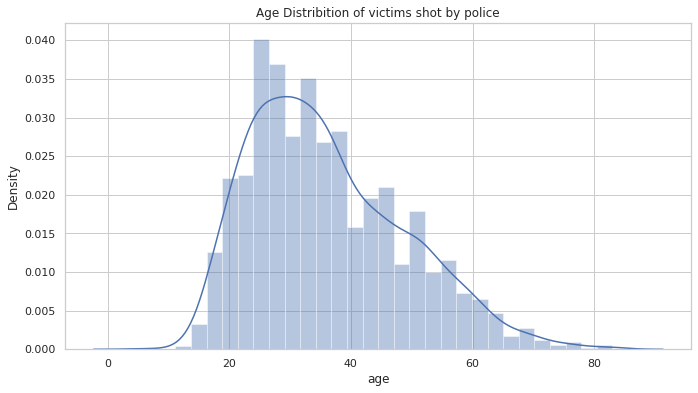

In [111]:
fig = plt.figure(figsize=(10, 6))
sns.distplot(df_clean["age"], bins=30)
plt.title("Age Distribition of victims shot by police")
plt.show()

**Findings**
 

*   The most vulnarable age is 20-40 where the most vitims were shot by police, the age group were least effected 
*  The children under age 20 is 118 were killed by police






**5.2 race vs age**

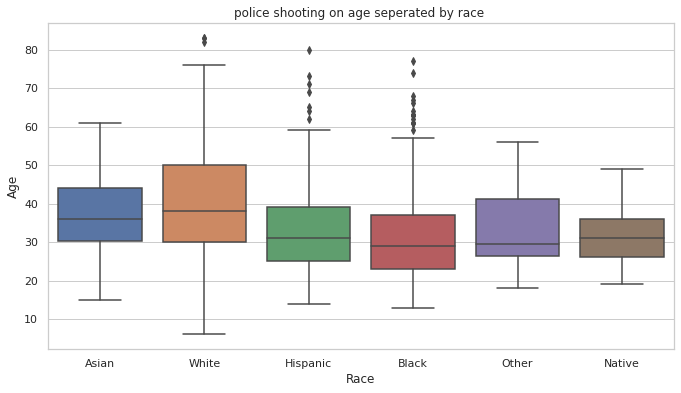

In [112]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x="race", y="age", data=df_clean)
plt.xlabel("Race")
plt.ylabel("Age")
plt.title("police shooting on age seperated by race ")
plt.show()

**5.3 Unarmed killings**

In [113]:
# race that were armed
r_arm = df_clean
r_arm["armed"] = df_clean["armed"] != "unarmed"
armed_r = r_arm.groupby(["race", "armed"], as_index=False).index.count()
armed_r.sort_values(by=["armed", "index"], ascending=[False, False], inplace=True)
armed_r = armed_r.rename(columns={"index": "count"})
armed_r.head()

,race,armed,count
10,White,True,962
2,Black,True,467
4,Hispanic,True,326
0,Asian,True,32
6,Native,True,24


**Findings:**


*   Average age for most of the races are in there 30's and all of them being in the early 30's, except of the white population that had there mean centered around 35+.
*   From the analysis we can see that white race is mostly killed by the police.The  Hispanic and Black population look very close together. The Native American and Asian population having least effected by police shootings





**5.3 young vs adult**

In [114]:
def comparisonquery(df, feature, condition):
    """return the query based on requirement"""

    comparison_string = feature + condition
    return df.query(comparison_string)

In [115]:
x = "race"
y = "age"
df1 = comparisonquery(df_clean, y, ">=25")[[x, y]]
df2 = comparisonquery(df_clean, y, "<25")[[x, y]]

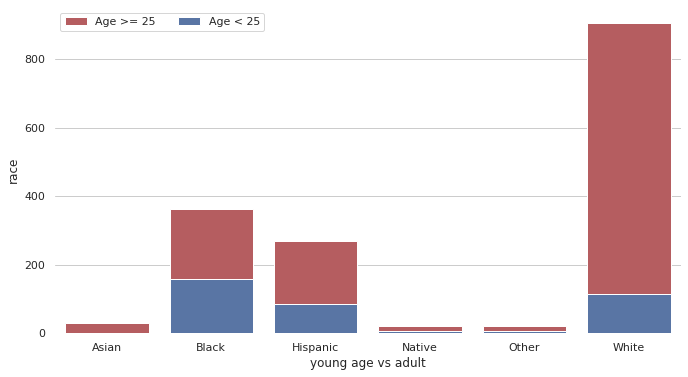

In [116]:
r = df1.groupby(x)[x].count()
t = df2.groupby(x)[x].count()
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=r, x=r.index, label="Age >= 25", color="r")
sns.barplot(y=t, x=t.index, label="Age < 25", color="b")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel="young age vs adult")
sns.despine(left=True, bottom=True)

Findings:



*   Most of the Victims from Asian population who are younger than 25
*    victims of  Black, Hispanic, and White population are mostly older than 25





**5.4 shooting by race**

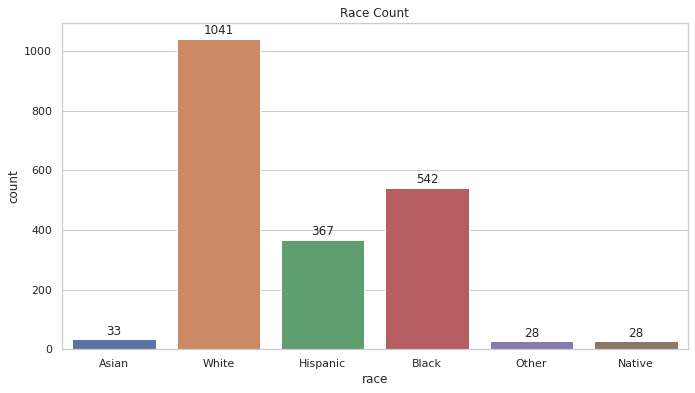

In [117]:
plt.figure(figsize=(10, 6))
rplot = sns.countplot(x=df["race"])
for k in rplot.patches:
    plt.annotate(
        k.get_height(),
        (k.get_x() + k.get_width() / 2.0, k.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
    )
plt.title("Race Count")
plt.show()

**findings:**

white race is mostly shot by police , also points
to be noted that white is the major population in USA

**5.5 calculating the proportion of armed and unarmed shootings**

In [118]:
df_prop = (
    armed_r.pivot("race", "armed", "count")
    .apply(lambda x: x / x.sum(), axis=1)
    .sort_values(by=True)
    .dropna()
)
df_prop

armed,False,True
race,,
Other,0.142857,0.857143
Black,0.107075,0.892925
Hispanic,0.081690,0.918310
Native,0.076923,0.923077
White,0.058708,0.941292


the proportion analysis showcasing the white race who are armed are the victims and highest shooting rate 

In [119]:
# lets see the the proportion for unarmed race.
df_prop[False].reset_index()

,race,False
0,Other,0.142857
1,Black,0.107075
2,Hispanic,0.081690
3,Native,0.076923
4,White,0.058708


we can see that only about 6% of white people were shot unarmed, almost double at about 11%, we should consider here some points about on what basis these shooting took place such as racism, indiscipline a deep investigation needed from USA governments.


**5.6 caluting the proportion of male and female victims**

In [120]:
def cplot(fig, data, feature, title, label1, label2):

    ax = None

    ax = sns.countplot(data=data, x=feature)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.title(title)

    if ax is not None:
        for p in ax.patches:
            percentage = "{:.1f}%".format(100 * p.get_height() / len(data))
            x = p.get_x() + p.get_width() - 0.5
            y = p.get_height() + 0.1
            ax.annotate(percentage, (x, y))
    plt.show()

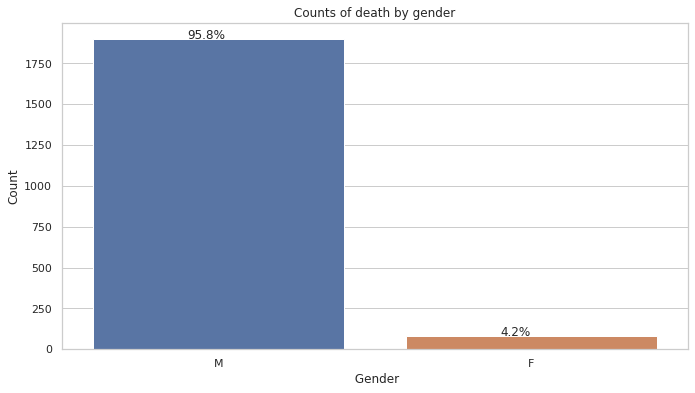

In [121]:
ylabel = "Count"
xlabel = " Gender"
title = "Counts of death by gender"
plt.figure(figsize=(10, 6))
cplot("seaborn", df_clean, "gender", title, ylabel, xlabel)

**Findings:**

mostly males were the victims about 96% were shot by police while comapring with females of 4.2%

victims fleeing methods

**5.7 calculation the proportion of fleeing methods**

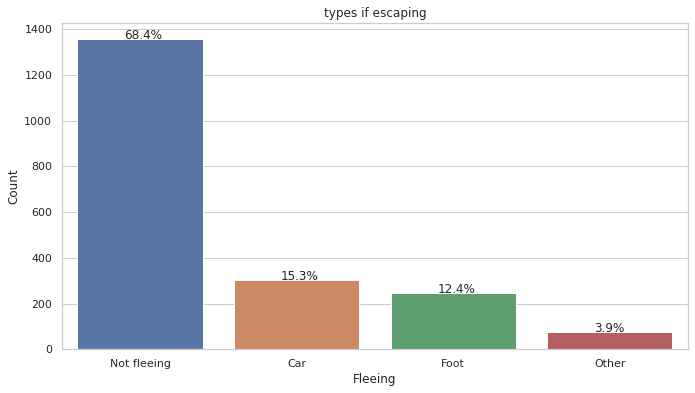

In [122]:
# types of escaping
ylabel = "Count"
xlabel = "Fleeing"
title = "types if escaping"
plt.figure(figsize=(10, 6))
cplot("seaborn", df_clean, "flee", title, ylabel, xlabel)

**Findings**

we can observe that not feeling took lot chunk of portion of the dataset and with this we can analyse that most of the victims not tried to flee during the shoot out


Only 15% of people tried to flee by car and 12% tried to flee by foot

**5.8 Threat Types**

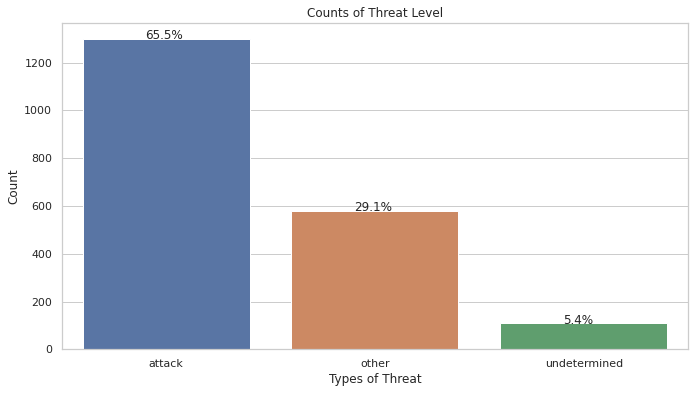

In [123]:
# types of threats
ylabel = "Count"
xlabel = "Types of Threat"
title = "Counts of Threat Level"
plt.figure(figsize=(10, 6))
cplot("seaborn", df_clean, "threat_level", title, ylabel, xlabel)

**Findings:**

 about 65% of the victims were attacted by the police and some victims of 29% has other types threat and 5% of them is the threat is undetermined.


**5.9 shooting by state**

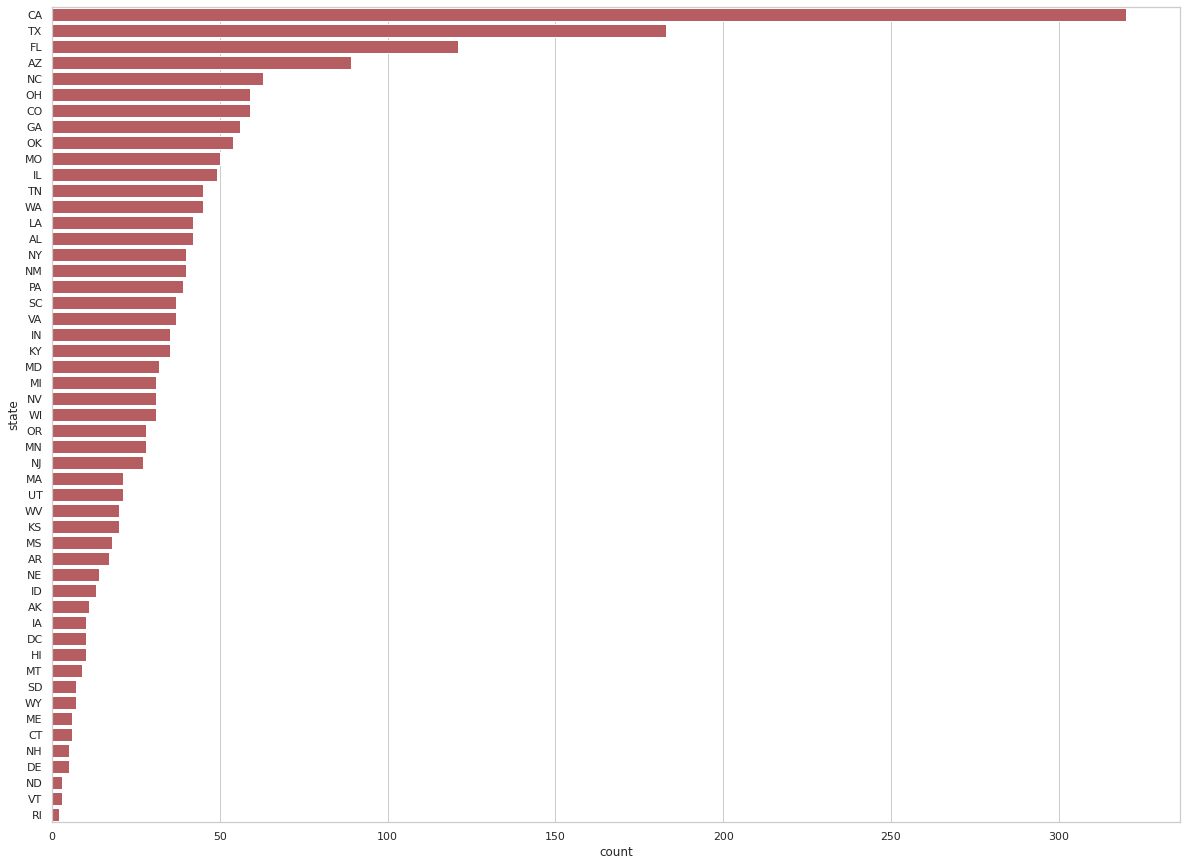

In [124]:
ylabel = "Count"
xlabel = "Types of Threat"
title = "state wide killing"
plt.figure(figsize=(18, 15))
sns.countplot(y="state", data=df_clean, order=df_clean.state.value_counts().index, color="r")

**Findings:**

California is the state with the Highest Number of Killings followed by Texas, Florida, Arizona, and so on We can see that California has by far the most fatal shootings by the police

**5.11 shootings by city**

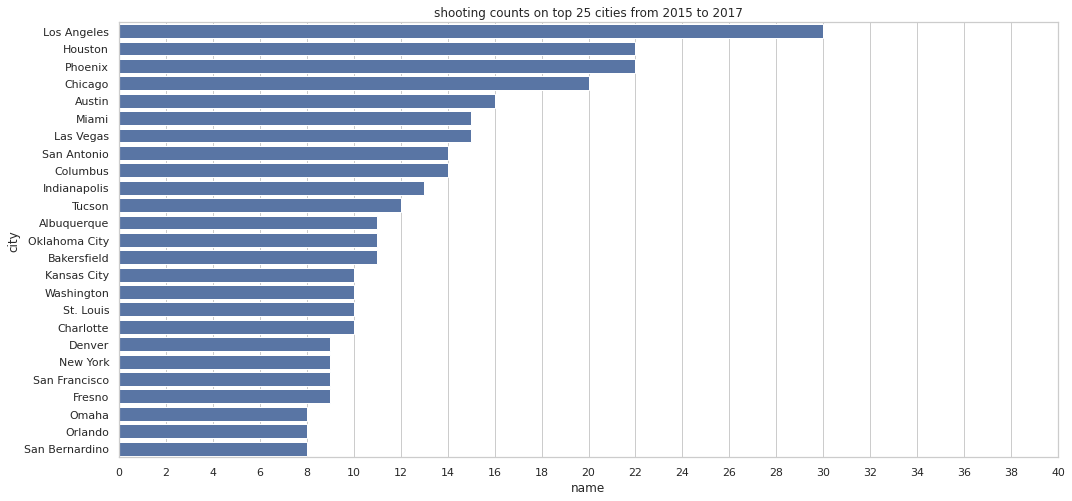

In [125]:
x = df_clean.groupby("city")["name"].count()
x = x.sort_values(ascending=False)[:25]
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=x, y=x.index, color="b")
plt.xticks(np.arange(0, 41, 2))
plt.title("shooting counts on top 25 cities from 2015 to 2017");

**Findings:**

losangeles is the most effected city with 30 deaths followed by houston, phoenix etc.

**5.12 shootings by year**

In [126]:
df_clean.dtypes

index                               int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                                bool
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

**5.13 Mental Ilness**

In [127]:
mental_ilness = df_clean.groupby(
    ["state", "signs_of_mental_illness"], as_index=False
).index.count()
mental_ilness.sort_values(
    by=["signs_of_mental_illness", "index"], ascending=[False, False], inplace=True
)
mental_ilness
mental_ilness = mental_ilness.rename(columns={"index": "count"})
mental_ilness
# checking where the mental illness is true
mental_ilness_true = (
    mental_ilness[mental_ilness["signs_of_mental_illness"] == True]
    .drop("signs_of_mental_illness", axis=1)
    .reset_index(drop=True)
)
mental_ilness_true.head(3)

,state,count
0,CA,76
1,TX,45
2,FL,34


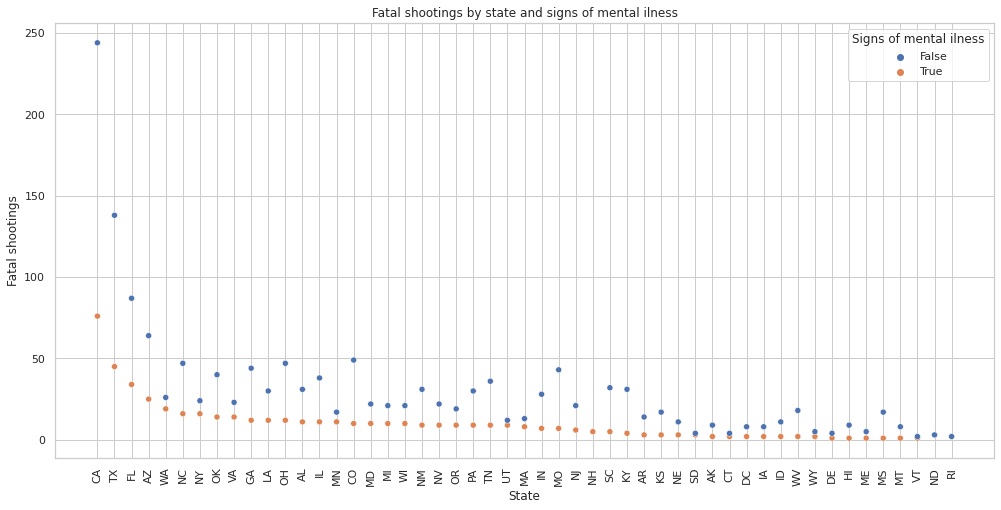

In [128]:
# Plotting the data
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(
    ax=ax, data=mental_ilness, x="state", y="count", hue="signs_of_mental_illness"
).legend(
    loc="Upper left",
    title="Signs of mental ilness",
)
plt.xticks(rotation=90)
ax.xaxis.grid(True)
plt.ylabel("Fatal shootings")
plt.xlabel("State")
plt.title("Fatal shootings by state and signs of mental ilness")
plt.show()

**Findings:**

califirnia , texas, and florida carrying ovr the most cases of fatal shooting.

California has by far the most fatal shootings by the police

# **6. Dimensionality reduction**

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.


What are the principal components? Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the original features.



Steps involved in PCA:


Scaling the data: PCA tries to get the features with the maximum variance and the variance is high for high magnitude features. So we need to scale the data.


Calculate the covariance to understand the variables that are highly correlated.


Calculate eigen vectors and eigen values (they are computed from covariance).


Eigen vectors determine the direction of new feature space.


Eigen values determine their magnitude ie., the scalar of the respective eigen vectors.


For eg. if you have 2 dimensional dataset, there will be 2 eigen vectors and their respective eigen values. Reason for having the eigen vectors is to use the covariance matrix to understand where in the data, there is more amount of variance. The covariance matrix generally gives the overall variance among all the variables in the data. More the variance denotes more information about the data. So eigen vector will tell where in the data, we have maximum variance.
Compute the Principal Components.


After identifying eigen vectors and eigen values, sort them in descending order. Highest eigen value is the most siginificant component.


PCs are the new features that are obtained and they posses most of the useful information that was scattered among the initial variables.



These PCs are orthogonal to each other ie., the correlation between 2 variables will be zero.
Reduce the dimensions of the data:
Eliminate the PCs that have least eigen value. They are not important.

In [129]:
# dropping some features that has more unique values only for this task(but in general we can perform onehot encoding)
df_clean.drop(["name", "city", "state", "date", "threat_level", "index"], axis=1, inplace=True)

In [130]:
df_clean["body_camera"] = df_clean["body_camera"].astype("int64")

In [131]:
# Lets Encode these Object Data Types as Numerical Data Types

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean["manner_of_death"] = le.fit_transform(df_clean["manner_of_death"])
df_clean["signs_of_mental_illness"] = le.fit_transform(df_clean["signs_of_mental_illness"])
df_clean["armed"] = le.fit_transform(df_clean["armed"])
df_clean["race"] = le.fit_transform(df_clean["race"])
df_clean["flee"] = le.fit_transform(df_clean["flee"])
df_clean["gender"] = le.fit_transform(df_clean["gender"])
df_clean["body_camera"] = le.fit_transform(df_clean["body_camera"])

# lets again check whether there any Object Data Type Columns are Left
df_clean.select_dtypes("object").columns

Index([], dtype='object')

In [132]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          1986 non-null   int64  
 1   armed                    1986 non-null   int64  
 2   age                      1986 non-null   float64
 3   gender                   1986 non-null   int64  
 4   race                     1986 non-null   int64  
 5   signs_of_mental_illness  1986 non-null   int64  
 6   flee                     1986 non-null   int64  
 7   body_camera              1986 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 124.2 KB


In [133]:
df_clean.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,flee,body_camera
0,0,1,53.0,1,0,1,2,0
1,0,1,47.0,1,5,0,2,0
2,1,0,23.0,1,2,0,2,0
3,0,1,32.0,1,5,1,2,0
4,0,1,39.0,1,2,0,2,0


In [134]:
# lets split the Target Column race from the Dataset


y = df_clean["race"]
x = df_clean.drop(["race"], axis=1)

# lets check the shape of the dataset
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1986, 7)
Shape of y:  (1986,)


In [135]:
# Spiltting dataset into train and tests

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Shape of X_train is ", X_train.shape)
print("Shape of X_test is ", X_test.shape)
print("Shape of Y_train is ", Y_train.shape)
print("Shape of Y_test is ", Y_test.shape)

Shape of X_train is  (1588, 7)
Shape of X_test is  (398, 7)
Shape of Y_train is  (1588,)
Shape of Y_test is  (398,)


**Standardization**

Standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms.

In [136]:
# Standardization

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [137]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_sc)
x_test_pca = pca.transform(X_test_sc)

In [138]:
# This result the variance explained by the number of components taken into account

pca.explained_variance_ratio_.cumsum()

array([0.34147729, 0.51908699, 0.65835232, 0.78190525, 0.88014143,
       0.9547696 , 1.        ])

it explains the 5 components itself has more than 88 % variance.

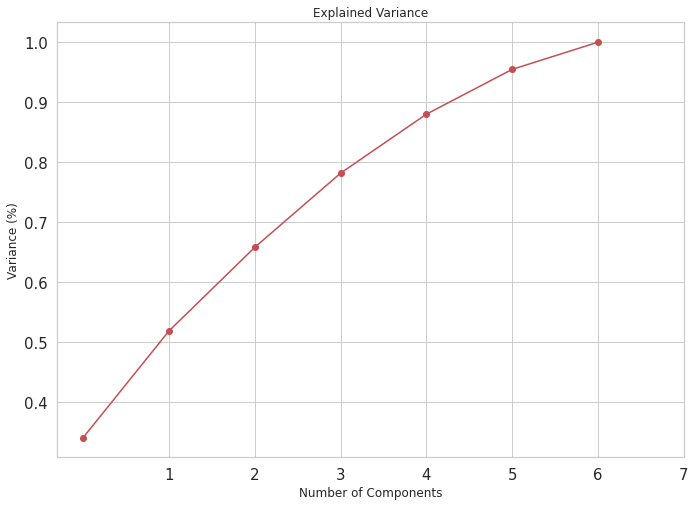

In [139]:
# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), c="r", marker="o")
# np.cumcum - Returns the cumulative sum of the elements along a given axis.
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")  # for each component
plt.xticks([i + 1 for i in range(len(pca.explained_variance_ratio_))], fontsize=15)
plt.yticks(fontsize=15)
plt.title("Explained Variance")
plt.show()

I am taking only two components which consists above 50% variance for this project

In [140]:
# repeating PCA with only 2 components to be able to plot it

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train_sc)
x_test_pca = pca.transform(X_test_sc)

In [141]:
print(
    f"The 2 components account for {round(np.sum(pca.explained_variance_ratio_)*100, 2)}% variance"
)

The 2 components account for 51.91% variance


In [142]:
df = pd.DataFrame(
    {"x_train_pca0": x_train_pca[:, 0], "x_train_pca1": x_train_pca[:, 1], "race": Y_train}
)
df

,x_train_pca0,x_train_pca1,race
318,0.747350,-0.132879,2
1732,0.782705,-0.118530,1
1084,-0.228939,-0.121208,1
1626,-0.223572,0.873791,2
251,-0.221159,0.873589,1
...,...,...,...
835,-0.330647,-0.100265,5
1216,0.789261,-0.144133,5
1653,-0.332255,-0.100130,5
559,-0.226527,-0.121410,1


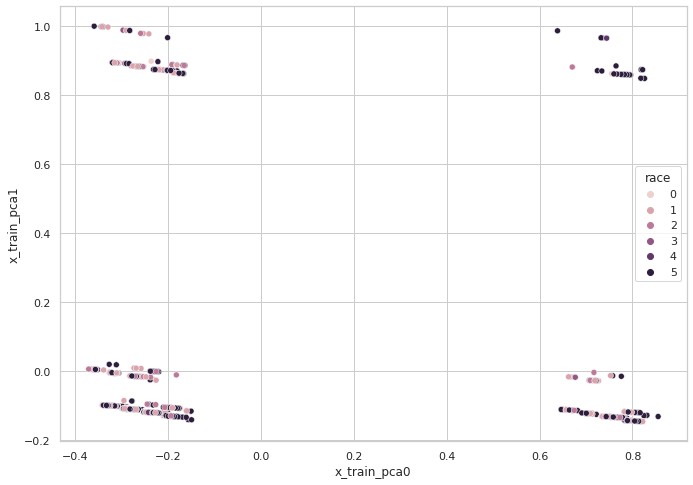

In [143]:
# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(df["x_train_pca0"], df["x_train_pca1"], hue=df["race"])

**Findings**

As we can see, principal component analysis forms four distinct clusters of data and there is still some separation by race between the clusters even though using only two principal components accounted for 52% of the variance



# **7.t-SNE**


t-distributed stochastic neighbor embedding is a machine learning algorithm for visualization based on Stochastic Neighbor Embedding

 originally developed by Sam Roweis and Geoffrey Hinton, where Laurens van der Maaten proposed the t-distributed variant.

In [144]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_train_tsne = pca.fit_transform(X_train_sc)
x_test_tsne = pca.transform(X_test_sc)

In [145]:
df1 = pd.DataFrame(
    {"x_train_tsne0": x_train_tsne[:, 0], "x_train_tsne1": x_train_tsne[:, 1], "race": Y_train}
)
df1

,x_train_tsne0,x_train_tsne1,race
318,0.747350,-0.132879,2
1732,0.782705,-0.118530,1
1084,-0.228939,-0.121208,1
1626,-0.223572,0.873791,2
251,-0.221159,0.873589,1
...,...,...,...
835,-0.330647,-0.100265,5
1216,0.789261,-0.144133,5
1653,-0.332255,-0.100130,5
559,-0.226527,-0.121410,1


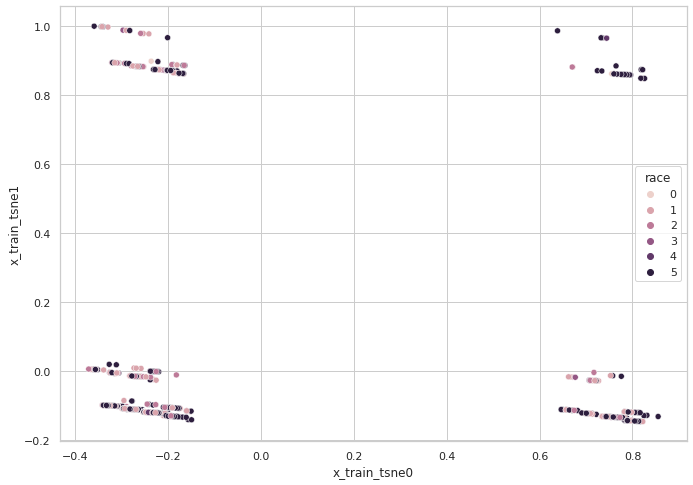

In [146]:
# lets create a plot
# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(df1["x_train_tsne0"], df1["x_train_tsne1"], hue=df1["race"])

**Findings:**

The graph shows , t-SNE performed similar to PCA 

# **8.Cluster analysis**

Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data. A cluster is a collection of objects which are “similar” amongst themselves and are “dissimilar” to the objects belonging to a different cluster

**8.1 elbow technique ti find optimal k**

Elbow method is the most popular method that is used to determine the optimal value of k.

How it works?

Start with some K.

Calculate WCSS (Within Cluster Sum of squared errors) ie., for each of the cluster, it calculate the distance of individual data points from the centroid, then square it and sum it up.

       WCSS = WCSS1 + WCSS2 + ..... WCSSk
Take new value for K, repeat step2.

For each number of K, WCSS is calculated.

Find the elbow point. That is the optimal value of K.



In [147]:
# x=df_clean
# x.head()

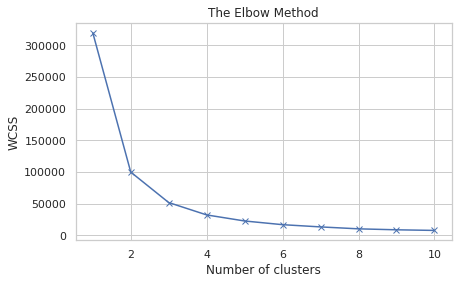

In [148]:
# elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, "bx-")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

by seeing the graph, the optimal k is either at 4  so I will perform k-means clustering with the k of 4



# **9.Machine Learning Model**

**KNN Model**

In [165]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_sc, Y_train)

KNeighborsClassifier(n_neighbors=1)

**Model Evaluation**

In [167]:
y_pred = knn_model.predict(X_test_sc)

In [168]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [170]:
accuracy_score(Y_test, y_pred)

0.4296482412060301

In [174]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.34      0.35      0.35       110
           2       0.12      0.10      0.11        62
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       0.61      0.59      0.60       213

    accuracy                           0.43       398
   macro avg       0.18      0.17      0.18       398
weighted avg       0.44      0.43      0.43       398



The model is avaerage, the proportion of white killing is 51% and our model predicted 42% with many features removed, and need more preprocessing, cleaning, and some hypermeter tuning makes the model to predict better

# **10.Conclusion**

Most of the victims are killed by shooting;

White and Black race people are the most affected;

Black Race people are widely killed in the US comparing the relative proportion of the race in the United States;

Males are more victims of fatal shootings than women;
Victims with no sign of mental illness are three times than victims with a sign of mental illness;


The absence of a body camera is more frequent with respect to its presence.

Most of the victims were youngsters (aged between 20 -40)

The states of California, Texas, and Florida have recorded the most number of deaths

In conclusion, the data analysis suggests that most of the victims were killed in a suspicious matter. The rate was also almost twice as high for the black population.

